In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import data into separate columns
input = '../data/data.dat'
distance, error, velocity = np.loadtxt(input, usecols = (0,1,2), unpack = True, skiprows=7, delimiter='\t')

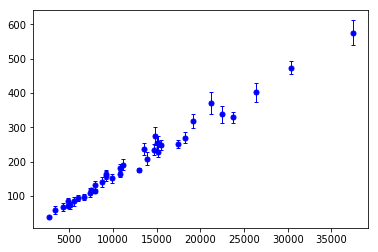

In [7]:
#initial plot
%matplotlib inline
plt.errorbar(velocity, distance, yerr=error, fmt='bo', capsize=2, elinewidth=1, markersize=5)
plt.show()

In [8]:
fit = np.polyfit(velocity, distance, deg=1)

#check
print(fit)

[ 0.01535263  5.16280981]


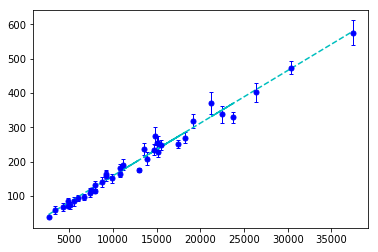

In [60]:
#plot data with polyfit line

bestfit = fit[1]+fit[0]*velocity

%matplotlib inline
plt.errorbar(velocity, distance, yerr=error, fmt='bo', capsize=2, elinewidth=1, markersize=5)
plt.plot(velocity, bestfit, 'c--')
plt.show()

In [20]:
residuals = distance-bestfit
print(residuals)

[ -7.13599901   0.82068841  -1.89633583  -7.65010859 -11.32062988
   4.56875641  -5.40599783  -3.64878912 -11.12740855  -9.11587446
 -12.24593556  -4.28072113   6.02406444   0.7570402   -4.51603712
  11.64424891  16.90167225  -6.6477545  -28.12648581  11.18133543
  15.37157068  -9.84744666 -11.19892879   3.53015083  23.84693982
   4.37774832 -21.24492991  16.71591788  16.48311627 -16.01748595
  42.47545769  20.70822    -40.71605223 -13.08919183  38.75320036
  -7.91552977   3.44328563  -4.455771  ]


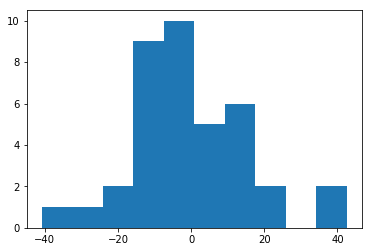

In [59]:
%matplotlib inline
plt.hist(residuals)
plt.show()

In [38]:
#is this distribution gaussian?
#f(x,mu,sigma) = (1/(sigma*sqrt(2pi)))*e^((x-mu)^2/(2*sigma^2))
#mu = mean; sigma = stdev

In [39]:
sigma = np.std(residuals)
mu = np.mean(residuals)
x = np.arange(-40,40)

In [42]:
#check
print(sigma, mu, 2*'\n')
print(x)

16.2995080336 4.93640216423e-14 


[-40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23
 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5
  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39]


In [43]:
def Gaussian(x, mu, sigma):
    """models a normal Gaussian distribution with mean mu,
    standard deviation sigma, and domain x"""
    
    f1 = (1/(sigma*np.sqrt(2*np.pi)))
    f2 = np.power(np.e, -np.power(x-mu, 2)/(2*np.power(sigma, 2)))
    
    values = f1*f2
    
    return values
    
    

In [56]:
gaussianFit = 400*Gaussian(x, mu, sigma)
print(gaussianFit)

[ 0.48199643  0.5592604   0.64647185  0.74447562  0.8541156   0.97622098
  1.11159077  1.26097662  1.42506426  1.60445364  1.79963822  2.01098372
  2.23870675  2.48285396  2.74328199  3.01963909  3.31134885  3.61759665
  3.93731952  4.26919988  4.61166367  4.96288344  5.32078651  5.68306866
  6.04721324  6.41051577  6.77011386  7.12302197  7.46617052  7.79644888
  8.11075116  8.40602407  8.67931581  8.9278249   9.14894774  9.34032397
  9.49987834  9.62585815  9.71686528  9.77188204  9.7902901   9.77188204
  9.71686528  9.62585815  9.49987834  9.34032397  9.14894774  8.9278249
  8.67931581  8.40602407  8.11075116  7.79644888  7.46617052  7.12302197
  6.77011386  6.41051577  6.04721324  5.68306866  5.32078651  4.96288344
  4.61166367  4.26919988  3.93731952  3.61759665  3.31134885  3.01963909
  2.74328199  2.48285396  2.23870675  2.01098372  1.79963822  1.60445364
  1.42506426  1.26097662  1.11159077  0.97622098  0.8541156   0.74447562
  0.64647185  0.5592604 ]


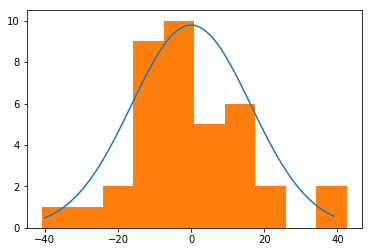

In [62]:
%matplotlib inline
plt.plot(x, gaussianFit)
plt.hist(residuals)
plt.show()